## MSAI Statistics Home Assignment 5-8\
#### soft deadline: 22/05/2024 19:00 GMT+3\
#### hard deadline: 22/05/2024 19:00 GMT+3\
As announced earlier, grading for HWs consists of points and bonus points. Solving bonus\
(indicated with a star) problems is not required, but recommended. Solving all homeworks’ normal\
problems correctly will give you a score of 7, solving all homeworks’ bonus problems correctly will\
give you additional 2 points to the score.\
Hand-written solutions are accepted if the handwriting is clear enough and scanned with\
sufficient quality, but LaTeX is always preferable. This homework includes a python task, which\
can be solved in Google Colab or in a local Jupyter Notebook. It is thus handy to solve everything\
(both LaTeX and code) in a single Jupyter Notebook.\
Solutions obtained with the use of ChatGPT and similar models can be accepted if the solution\
is clearly indicated as such, and model version and prompt is provided. If the solution is found to\
be from ChatGPT and similar models without indication and model/prompt detail, the teachers\
will evaluate the problem as zero points.

# Problem 1: Pearson's Chi-squared Test

Suppose you have the following sample data:

| **Interval** | 0  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  |
|--------------|----|----|----|----|----|----|----|----|----|----|
| **Counts**   | 74 | 92 | 83 | 79 | 80 | 73 | 77 | 75 | 76 | 91 |

Use the Pearson $\chi^2$ test to test hypothesis at $\alpha = 0.05$ levell. 

- $H_0$: $X \sim \mathcal{U}[0,9]$ (the data follows a uniform distribution)
- $H_1$: $X \not\sim \mathcal{U}[0,9]$

## Шаг 1:

У нас есть интервал наблюдений от 0 до 9.

Для проверки гипотезы о том, что наблюдаемые данные имеют равномерное распределение, я проведу тест хи-квадрат Пирсона.

$$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

## Шаг 2: Расчет общего количества наблюдений

Общее количество наблюдений: $$n = 74 + 92 + 83 + 79 + 80 + 73 + 77 + 75 + 76 + 91 = 800$$

## Шаг 3: Расчет ожидаемых частот

При равномерном распределении $\mathcal{U}[0,9]$ ожидаемая частота для каждого интервала должна быть одинаковой:

$ E_i = \frac{n}{10} = \frac{800}{10} = 80 $ наблюдений для каждого интервала

## Шаг 4: Расчет статистики хи-квадрат

Рассчитаем значение статистики $\chi^2$ по формуле:

$$\chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}$$

где $O_i$ — наблюдаемые частоты, а $E_i = 80$ для всех $i$.

Рассчитаем каждую часть:

$\frac{(74-80)^2}{80} = \frac{36}{80} =0.45$

$\frac{(92-80)^2}{80} = \frac{144}{80} =1.8 $

$\frac{(83-80)^2}{80} = \frac{9}{80} =0.1125 $

$\frac{(79-80)^2}{80} = \frac{1}{80} =0.0125 $

$\frac{(80-80)^2}{80} =0 $

$\frac{(73-80)^2}{80} = \frac{49}{80} =0.6125 $

$\frac{(77-80)^2}{80} = \frac{9}{80} =0.1125 $

$\frac{(75-80)^2}{80} = \frac{25}{80} =0.3125 $

$\frac{(76-80)^2}{80} = \frac{16}{80} =0.2 $

$\frac{(91-80)^2}{80} = \frac{121}{80} =1.5125 $

Просумируем эти значения:
$\chi^2 =0.45 +1.8 +0.1125 +0.0125 +0 +0.6125 +0.1125 +0.3125 +0.2 +1.5125 =5.125$

$\chi^2 =5.125$

## Шаг 5: Степени свободы и критическое значение

$$df = k - 1 = 10 - 1 = 9$$

При $\alpha = 0.05$ критическое значение:

$$\chi^2_{0.05, 9} \approx 16.92$$

## Шаг 6: Правило принятия решения

Если $\chi^2_{\text{calc}} > \chi^2_{\text{critical}}$, отклоните $H_0$.

Поскольку $\chi^2 =5.125 <16.92$, мы не отклоняем $H_0$. 

In [1]:
import numpy as np
from scipy.stats import chisquare
observed = np.array([74,92,83,79,80,73,77,75,76,91])
expected = np.array([80] *10)
print('E_i:',expected[0])
chi2_stat, p_value = chisquare(observed, expected)

print(f"Chi-squared statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value <0.05:
 print("Reject H0: Data does not follow uniform distribution.")
else:
 print("Fail to reject H0: Data follows uniform distribution.")

E_i: 80
Chi-squared statistic: 5.1250
P-value: 0.8233
Fail to reject H0: Data follows uniform distribution.


# Problem 2: (2 points) Two-sample Student's t-test

Suppose you have the following two independent samples: $X \sim \mathcal{N}(\mu_x, \sigma^2), and \quad Y \sim \mathcal{N}(\mu_y, \sigma^2)$

Test the hypothesis at significance level $\alpha = 0.05$ using Student's two-sample $t$-test (assuming equal variances):

$H_0 : \mu_x = \mu_y $

$H_1 : \mu_x \ne \mu_y$


| Interval | X    | Y     |
|----------|------|-------|
| 1        | -1.75| -0.29 |
| 2        | -0.33| 0.09  |
| 3        | -1.26| 1.70  |
| 4        | 0.32 | -1.09 |
| 5        | 1.53 | -0.44 |
| 6        | 0.35 | -0.29 |
| 7        | -0.96| 0.25  |
| 8        | -0.06| -0.54 |
| 9        | 0.42 | -1.38 |
| 10       | -1.08| 0.32  |



## Шаг 1: Найдём средние значения и стандартные отклонения

### Среднее значение $ \bar{y} $

У нас есть 10 значений для $ Y $:

$
Y = [-0.29, 0.09, 1.70, -1.09, -0.44, -0.29, 0.25, -0.54, -1.38, 0.32]
$

Суммируем их:

$
\sum Y_i = -0.29 + 0.09 + 1.70 - 1.09 - 0.44 - 0.29 + 0.25 - 0.54 - 1.38 + 0.32 = -1.67
$

**Затем делим на количество наблюдений (10) и получаем среднее:**

$
\bar{y} = \frac{-1.67}{10} = -0.167
$

$$\bar{y} = \frac{1}{10} \sum Y_i = -0.167$$ 

**Массив:**

$
X = [-1.75, -0.33, -1.26, 0.32, 1.53, 0.35, -0.96, -0.06, 0.42, -1.08]
$

$
\sum X_i = -2.82
$

**Считаем среднее:**


$$\bar{x} = \frac{-2.82}{10} = -0.282$$


### Дисперсии $ s_x^2 $ и $ s_y^2 $

### Формула выборочной дисперсии:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

### Пример: $ s_x^2 $


**Считаем сумму квадратов отклонений:**

$
\sum (x_i - \bar{x})^2 \approx 8.928
$

**Вычисляем дисперсию:**

$
s_x^2 = \frac{8.928}{9} \approx 0.992
$



### Аналогично для $ s_y^2 $:

**Считаем сумму квадратов отклонений от:**

$ \bar{y} = -0.167 $

Получаем:

$
\sum (y_i - \bar{y})^2 \approx 6.894
$

**Вычисляем дисперсию:**

$
s_y^2 = \frac{6.894}{9} \approx 0.766
$
$$s_x^2 = 0.992,\quad s_y^2 = 0.766$$ 

## Шаг 2: Объединённая дисперсия

Так как предполагаем равные дисперсии, используем объединённую дисперсию:

$$s_p^2 = \frac{(n_x - 1)s_x^2 + (n_y - 1)s_y^2}{n_x + n_y - 2} = \frac{(9)(0.992) + (9)(0.766)}{18} = 0.879$$ 

$$s_p = \sqrt{0.879} \approx 0.937$$ 

## Шаг 3: Расчёт t-статистики

$$t = \frac{\bar{x} - \bar{y}}{s_p \cdot \sqrt{\frac{1}{n_x} + \frac{1}{n_y}}} = \frac{-0.282 - (-0.167)}{0.937 \cdot \sqrt{0.2}} = \frac{-0.115}{0.4187} \approx -0.2746$$ 

## Шаг 4: Степени свободы и критическое значение

$$df = n_x + n_y - 2 = 18$$ 

Критическое значение при $\alpha = 0.05$ (двусторонний тест):

$$t_{0.025, 18} \approx \pm 2.101$$ 

## Шаг 5: Правило принятия решения

Если $|t| > t_{0.025, 18}$, отклоняем $H_0$.

$$|t| = 0.275 < 2.101 \Rightarrow \text{не отклоняем } H_0$$ 

## Вывод

Нет статистически значимого различия между средними значениями выборок $X$ и $Y$ на уровне значимости 0.05. Мы не отклоняем гипотезу $H_0$.

In [2]:
import numpy as np
from scipy import stats

# Data from the table
x = np.array([-1.75, -0.33, -1.26, 0.32, 1.53, 0.35, -0.96, -0.06, 0.42, -1.08])
y = np.array([-0.29, 0.09, 1.70, -1.09, -0.44, -0.29, 0.25, -0.54, -1.38, 0.32])

# Perform t-test (equal_var=True assumes equal variances)
t_stat, p_value = stats.ttest_ind(x, y, equal_var=True)

# Critical value at alpha = 0.05 (two-tailed, df = 18)
alpha = 0.05
df = len(x) + len(y) - 2
t_crit = stats.t.ppf(1 - alpha/2, df)

# Output results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical t-value: ±{t_crit:.4f}")

if abs(t_stat) > t_crit:
    print("Reject H0: There is a significant difference between the means.")
else:
    print("Fail to reject H0: No significant difference between the means.")

t-statistic: -0.2787
p-value: 0.7837
Critical t-value: ±2.1009
Fail to reject H0: No significant difference between the means.


## Problem 3. (4 bonus points)  Hypothesis Test for Normal Mean

Let $ X_1, \ldots, X_n \sim N(\theta, 1) $.  Consider the following test:

 $$ H_0: \theta = \theta_0 = 0 $$
 $$ H_1: \theta = \theta_1 = 1 $$

Let the rejection region be $R = \{ X : T(X) > c \}$ where, $T(X) = \frac{1}{n} \sum_{i=1}^{n} X_i$

### Рассуждения:

Нам даны наблюдения $ X_1, \ldots, X_n \sim N(\theta, 1) $ и нужно:
1. Найти $c$ — такое значение порога, чтобы вероятность ошибки первого рода была равна $α$ т.е. $P_{\theta =0}(T(X) > c) = α$


2. Найти мощность теста $β$ — т.е. вероятность отклонения $H_0$, когда $θ=1$ (альтернативная гипотеза верна)

Что означает каждая переменная?

1. **$ T(X) $** - Это тестовая статистика, а именно среднее всех наблюдений:
   $
   T(X) = \frac{1}{n} \sum_{i=1}^{n} X_i
   $
   - $ T(X) $ подчиняется нормальному распределению с математическим ожиданием $ \theta $ и дисперсией $ \frac{1}{n} $.

2. **$ c $** - Это порог (критическое значение), выше которого мы отвергаем нулевую гипотезу $ H_0 $. Это граница критической области.

3. **$ R $** - Это область отклонения нулевой гипотезы (критическа область):
   $
   R = \{ X : T(X) > c \}
   $
   - То есть, если среднее значение выборки $ T(X) $ превышает порог $ c $, мы отвергаем $ H_0 $.

### Шаг 1: Распределение тестовой статистики при $ H_0 $ и $ H_1 $

Так как $ X_i \sim N(\theta, 1) $, по центральной предельной теореме (ЦПТ):

- При $ H_0: \theta = 0 $ тогда $T(X) \sim N(0, \frac{1}{n})$
  
- При $ H_1: \theta = 1 $ тогда $T(X) \sim N(1, \frac{1}{n})$

### Шаг 2: Найдём порог $ c $, чтобы тест имел уровень значимости $ \alpha $

Хотим, чтобы вероятность ошибки первого рода была равна $ \alpha $ т.е. $P_{\theta = 0}(T(X) > c) = \alpha$

### Стандартизируем распределение:

$P_{\theta = 0}(T(X) > c) = P\left( Z > \frac{c - 0}{\sqrt{1/n}} \right)
= P\left( Z > c \cdot \sqrt{n} \right)$

### Решаем относительно $ c $:

$
c \cdot \sqrt{n} = z_{1 - \alpha} \Rightarrow c = \frac{z_{1 - \alpha}}{\sqrt{n}}
$

---

### Шаг 3: Мощность теста (power)

Мощность — это вероятность отклонить $ H_0 $, когда верна $ H_1 $:

$
\beta = P_{\theta=1}(T(X) > c) = P\left( Z > \frac{c - 1}{1/\sqrt{n}} \right) = P\left( Z > \sqrt{n}(c - 1) \right)
$

Подставим $ c = \frac{z_{1-\alpha}}{\sqrt{n}} $:

$
\beta = P\left( Z > \sqrt{n} \left( \frac{z_{1-\alpha}}{\sqrt{n}} - 1 \right) \right) = P\left( Z > z_{1 - \alpha} - \sqrt{n} \right)
$

---

### Пример: 

- $ \alpha = 0.05 $
- $ n = 10 $

- $ z_{1 - \alpha} = z_{0.95} \approx 1.645 $

Тогда:

$
c = \frac{1.645}{\sqrt{10}} \approx 0.520
$

Для мощности:

$
\beta = P\left( Z > 1.645 - \sqrt{10} \right) = P(Z > -1.516) \approx 0.935
$

---

### Ответы:

- (a) Критическое значение: $ c = \frac{z_{1 - \alpha}}{\sqrt{n}} $
- (b) Мощность теста: $ \beta = P(Z > z_{1 - \alpha} - \sqrt{n}) $

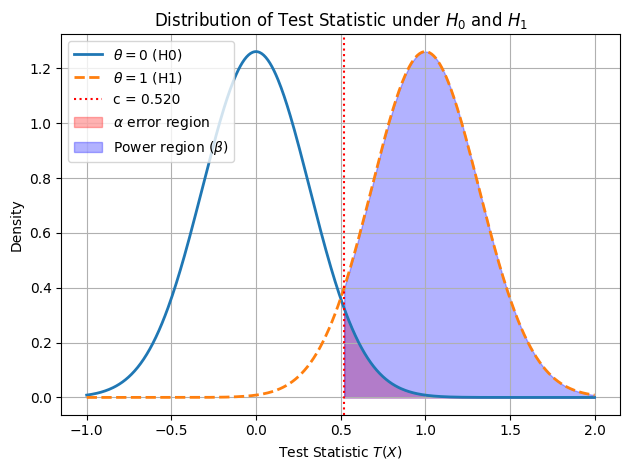

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
n = 10
alpha = 0.05
z_alpha = norm.ppf(1 - alpha)
c = z_alpha / np.sqrt(n)

# x-axis values for the plot
x_vals = np.linspace(-1, 2, 500)
pdf_h0 = norm.pdf(x_vals, loc=0, scale=1/np.sqrt(n)) # H0: theta = 0
pdf_h1 = norm.pdf(x_vals, loc=1, scale=1/np.sqrt(n)) # H1: theta = 1

# Plot
plt.plot(x_vals, pdf_h0, label=r'$\theta = 0$ (H0)', linewidth=2)
plt.plot(x_vals, pdf_h1, label=r'$\theta = 1$ (H1)', linewidth=2, linestyle='--')
plt.axvline(c, color='red', linestyle=':', label=f'c = {c:.3f}')
plt.fill_between(x_vals, 0, pdf_h0, where=(x_vals > c), color='red', alpha=0.3, label=r'$\alpha$ error region')
plt.fill_between(x_vals, 0, pdf_h1, where=(x_vals > c), color='blue', alpha=0.3, label=r'Power region ($\beta$)')

plt.title("Distribution of Test Statistic under $H_0$ and $H_1$")
plt.xlabel("Test Statistic $T(X)$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Интерпретация графика: Распределения тестовой статистики $ T(X) $

1. **Оси и шкала**  
   - Ось X представляет значения тестовой статистики $ T(X) = \overline{X} $, то есть среднее наблюдений.  
   - Ось Y отображает плотность вероятности, где высота кривой соответствует вероятности.

2. **Две кривые — два распределения**  
   - **Синяя кривая (сплошная)**:  
     Это распределение $ T(X) $ при нулевой гипотезе $ H_0: \theta = 0 $.  
     $ T(X) \sim N(0, \frac{1}{n}) $  
     
   - **Оранжевая кривая (пунктирная)**:  
     Это распределение $ T(X) $ при альтернативной гипотезе $ H_1: \theta = 1 $.  
     $ T(X) \sim N(1, \frac{1}{n}) $

3. **Вертикальная красная линия: критическое значение $ c $**  
   Порог $ c \approx 0.520 $ вычислен из условия:  
   $ P_{\theta=0}(T(X) > c) = \alpha = 0.05 $  
   Если наблюдаемое значение $ T(X) > c $, мы отклоняем $ H_0 $.

4. **Заштрихованные области**  
   - **Красная/фиолетовая область** (слева от синей кривой и справа от $ c $): это ошибка первого рода ($ \alpha $).  
     Это вероятность отклонить $ H_0 $, когда она на самом деле верна.  
     Формально:  
     $ \alpha = P_{\theta=0}(T(X) > c) $
     
   - **Синяя область** (под оранжевой кривой справа от $ c $): это мощность теста ($ \beta $).  
     Это вероятность правильно отклонить $ H_0 $, если истинное значение $ \theta = 1 $.  
     Формально:  
     $ \beta = P_{\theta=1}(T(X) > c) $

5. **Что видно из графика**  
   Распределения $ H_0 $ и $ H_1 $ перекрываются, но смещены.  
   Порог $ c $ выбирается так, чтобы:  
   - Левая часть под $ H_0 $ имела площадь $ \alpha $.  
   - Правая часть под $ H_1 $ имела площадь $ \beta $.

### Вывод по графику  
Чем больше расстояние между $ H_0 $ и $ H_1 $ (например, при большем $ n $), тем выше мощность ($ \beta $).

# Problem 4. (4 points): Anti-theft Alarm
You have an anti-theft alarm $a$ in your apartment. It can be triggered by:

* $a$ thief $t=1$
* an earthquake $e=1$
An earthquake may also cause a radio announcement $r=1$. We are given a Bayesian network:
$t→a←e→r$

The joint probability is:

$p(t, e, a, r) = p(a \mid t, e) \cdot p(r \mid e) \cdot p(t) \cdot p(e)$

### Рассуждения:
- **$t$**: вор в доме  
- **$e$**: землетрясение  
- **$a$**: сработала сигнализация  
- **$r$**: сообщение о землетрясении по радио  

Дано:  
- $ P(t=1) = 2 \cdot 10^{-4} $ $ \Rightarrow P(t=0) = 0.9998 $  
- $ P(e=1) = 0.01 $ $ \Rightarrow P(e=0) = 0.99 $  

### Вопрос 1:
Какова вероятность, что вор в квартире, если сработала сигнализация?

То есть $ P(t=1 \mid a=1) $.

Применим формулу Байеса:
$
P(t=1 \mid a=1) = \frac{P(t=1, a=1)}{P(a=1)}
$

**Числитель:**
$
P(t=1, a=1) = P(a=1 \mid t=1, e=0) \cdot P(t=1) \cdot P(e=0) + P(a=1 \mid t=1, e=1) \cdot P(t=1) \cdot P(e=1)
$
$
= 1 \cdot 0.0002 \cdot 0.99 + 1 \cdot 0.0002 \cdot 0.01 = 0.000198
$

**Знаменатель (все комбинации $ t, e $):**
$
P(a=1) = 0 + 0.1 \cdot 0.9998 \cdot 0.01 + 1 \cdot 0.0002 \cdot 0.99 + 1 \cdot 0.0002 \cdot 0.01
$
$
= 0 + 0.00009998 + 0.000198 + 0.000002 = 0.00029998
$

**Итог:**
$
P(t=1 \mid a=1) = \frac{0.000198}{0.00029998} \approx \boxed{0.6607}
$

---

### Вопрос 2:
Какова вероятность, что вор в квартире, если сработала сигнализация и на радио сообщили о землетрясении? То есть $ P(t=1 \mid a=1, r=1) $.

### Снова используем Байеса:
$
P(t=1 \mid a=1, r=1) = \frac{P(t=1, a=1, r=1)}{P(a=1, r=1)}
$

**Числитель:**
$
P(t=1, a=1, r=1) = \sum_e P(a=1 \mid t=1, e) \cdot P(r=1 \mid e) \cdot P(e) \cdot P(t=1)
$
$
= 1 \cdot 0.5 \cdot 0.01 \cdot 0.0002 = 1 \cdot 10^{-6}
$

**Знаменатель (все комбинации $ t, e $):**
$
P(a=1, r=1) = 0 + 0.1 \cdot 0.5 \cdot 0.9998 \cdot 0.01 + 0 + 1 \cdot 0.5 \cdot 0.0002 \cdot 0.01
$
$
= 0 + 0.0004999 + 0.000001 = 0.0005009
$

**Итог:**
$
P(t=1 \mid a=1, r=1) = \frac{1 \cdot 10^{-6}}{0.0005009} \approx \boxed{0.001998}
$

---

### Финальный ответ:
- $ P(t=1 \mid a=1) \approx \boxed{0.661} $
- $ P(t=1 \mid a=1, r=1) \approx \boxed{0.002} $

# Problem 5. (6 points) Computer experiment.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Загрузка данных
data = load_diabetes(as_frame=True)
df = data["frame"]
target = data["target"]

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
# Посмотрим на размерность данных
print(f"Размерность данных: {df.shape}")

# Посмотрим на статистические характеристики данных
df.describe()

Размерность данных: (442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


1. Признаки стандартизированы

Значения всех признаков (кроме target) находятся в пределах примерно от -0.13 до 0.19, а среднее значение близко к нулю (~0)

 и стандартное отклонение — примерно 0.0476 у всех признаков.

Это говорит о том, что признаки были предобработаны (нормализованы или стандартизированы) 

2. Распределение признаков

Минимумы и максимумы находятся на относительно симметричных расстояниях от нуля.

Медианы также очень близки к нулю, что говорит о приближенной симметричности распределений признаков.

Признак sex принимает только два значения: -0.0446 и 0.0507 — это закодированная бинарная переменная (вероятно, one-hot или dummy-кодировка).

In [8]:
# Проверим данные на наличие пропущенных значений   
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Пропущенных значений нет.

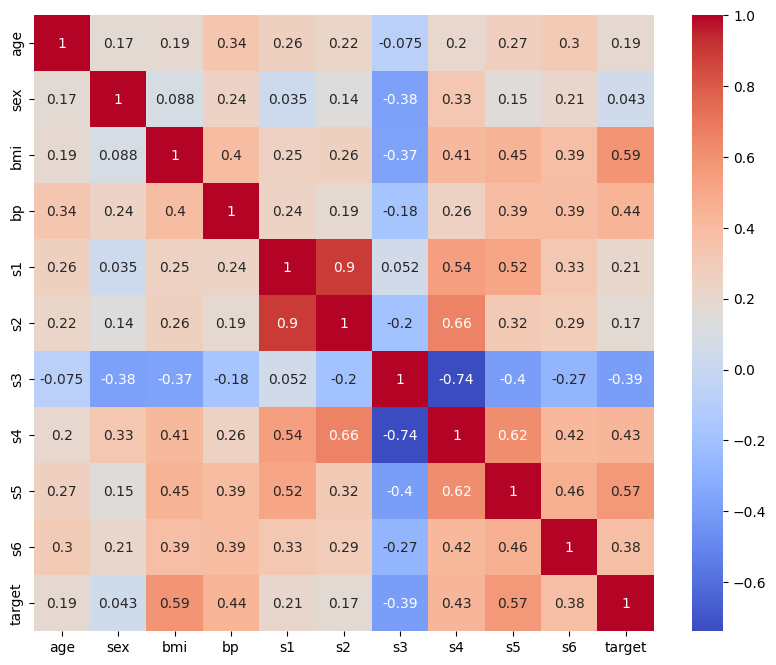

In [9]:
# посмотрим на корреляции между признаками и целевой переменной с heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

#### Некоторые признаки сильно коррелируют друг с другом:

* s1 и s2: корреляция 0.90
* s4 и s3: корреляция -0.74
* s4 и s2: 0.66
* s5 и s4: 0.62

Это означает, что в множественной линейной регрессии стоит быть осторожным с включением одновременно этих признаков, 

т.к. мультиколлинеарность может исказить оценки коэффициентов и увеличить дисперсию модели.

* sex: почти не коррелирует с target (0.043) и с большинством признаков. Возможно в дальнейшем можно удалить из признаков.

In [10]:
# Шаг 1: Вычислим коэффициенты корреляции Пирсона
feature_correlations = df.drop(columns="target").corrwith(target).sort_values(key=abs, ascending=False)
best_feature = feature_correlations.idxmax()
best_correlation = feature_correlations.max()

print(f"Лучший признак: {best_feature}, коэффициент корреляции Пирсона: {best_correlation}")

Лучший признак: bmi, коэффициент корреляции Пирсона: 0.5864501344746884


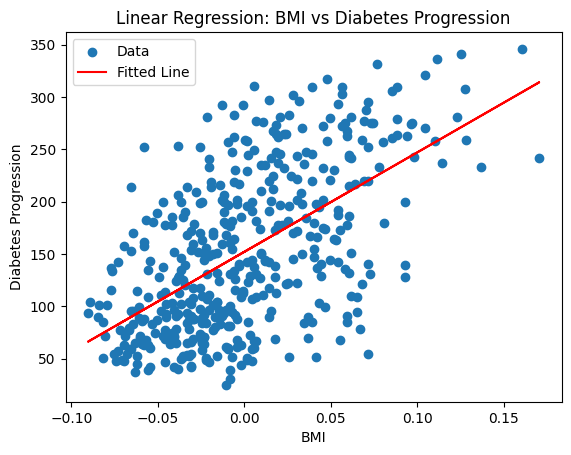

Results for BMI (X1): MSE = 3890.456585461273, MAE = 51.798627639533656


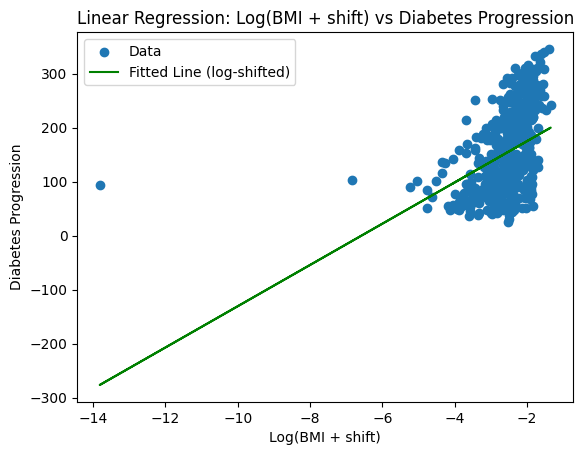

Results for Log(BMI + shift) (X2): MSE = 4872.855243265856, MAE = 58.59256023874697


In [11]:
# Prepare variables X1 = bmi and Y = target
X1 = df["bmi"]
Y = target

# Model linear regression for X1
model = LinearRegression()
model.fit(X1.values.reshape(-1, 1), Y)

# Predictions and evaluation for X1
Y_pred = model.predict(X1.values.reshape(-1, 1))
mse1 = mean_squared_error(Y, Y_pred)
mae1 = mean_absolute_error(Y, Y_pred)

# Plot data and fitted line for X1
plt.scatter(X1, Y, label="Data")
plt.plot(X1, Y_pred, color='red', label="Fitted Line")
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: BMI vs Diabetes Progression')
plt.legend()
plt.show()

# Print the evaluation metrics
print(f"Results for BMI (X1): MSE = {mse1}, MAE = {mae1}")

"""Т.к. при логарифмировани при отрицательных значениях я получил ошибку 
Выполнил сдвиг всех значений в положительную сторону считаю что это допустимая техника. (shifted transformation)."""


# --- Логарифмирование BMI с предварительным сдвигом ---
min_bmi = df["bmi"].min()
shift = -min_bmi + 1e-6 if min_bmi <= 0 else 0

X2 = np.log(df["bmi"] + shift)

model = LinearRegression()
model.fit(X2.values.reshape(-1, 1), Y)

Y_pred_log = model.predict(X2.values.reshape(-1, 1))
mse2 = mean_squared_error(Y, Y_pred_log)
mae2 = mean_absolute_error(Y, Y_pred_log)

plt.scatter(X2, Y, label="Data")
plt.plot(X2, Y_pred_log, color='green', label="Fitted Line (log-shifted)")
plt.xlabel('Log(BMI + shift)')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: Log(BMI + shift) vs Diabetes Progression')
plt.legend()
plt.show()

print(f"Results for Log(BMI + shift) (X2): MSE = {mse2}, MAE = {mae2}")

**Вторая диаграмма (log(BMI + shift)) искажена из-за нескольких сильно удалённых значений (outliers), оказавшихся далеко влево после логарифмирования.**
#### Что происходит:
При добавлении shift, минимальное значение bmi + shift становится очень близким к нулю.
Соответственно, log(bmi + shift) для этих значений уходит в большие отрицательные значения (~ -14), что создаёт левый хвост и "вытягивает" график.
В результате: модель плохо аппроксимирует основную массу данных.

#### Решения:
1. Удалить или отфильтровать выбросы после логарифмирования
2. Использовать более «мягкое» преобразование, например np.log1p()
3. Заменить экстремальные значения на границу (тримминг)

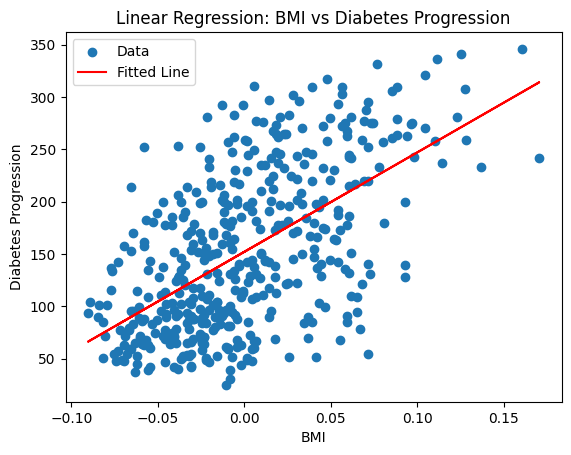

Results for BMI (X1): MSE = 3890.46, MAE = 51.80


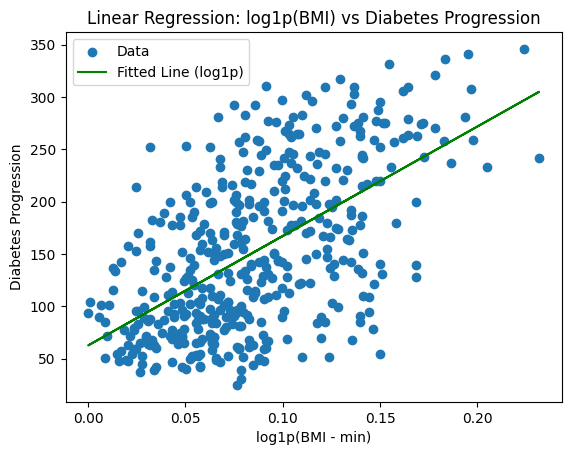

Results for log1p(BMI) (X2): MSE = 3894.50, MAE = 51.85


In [12]:
# Без экспериментов применим 2 вариант логарифмирования BMI.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import load_diabetes

# Загрузка данных
data = load_diabetes(as_frame=True)
df = data["frame"]
target = data["target"]

# --- Линейная модель по исходному BMI ---
X1 = df["bmi"]
Y = target

model = LinearRegression()
model.fit(X1.values.reshape(-1, 1), Y)

Y_pred = model.predict(X1.values.reshape(-1, 1))
mse1 = mean_squared_error(Y, Y_pred)
mae1 = mean_absolute_error(Y, Y_pred)

plt.scatter(X1, Y, label="Data")
plt.plot(X1, Y_pred, color='red', label="Fitted Line")
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: BMI vs Diabetes Progression')
plt.legend()
plt.show()

print(f"Results for BMI (X1): MSE = {mse1:.2f}, MAE = {mae1:.2f}")

# --- Log1p-преобразование BMI ---
bmi_shifted = df["bmi"] - df["bmi"].min()  # сдвигаем так, чтобы минимум стал 0
X2 = np.log1p(bmi_shifted)

# Модель по log1p(BMI)
model = LinearRegression()
model.fit(X2.values.reshape(-1, 1), Y)

Y_pred_log = model.predict(X2.values.reshape(-1, 1))
mse2 = mean_squared_error(Y, Y_pred_log)
mae2 = mean_absolute_error(Y, Y_pred_log)

plt.scatter(X2, Y, label="Data")
plt.plot(X2, Y_pred_log, color='green', label="Fitted Line (log1p)")
plt.xlabel('log1p(BMI - min)')
plt.ylabel('Diabetes Progression')
plt.title('Linear Regression: log1p(BMI) vs Diabetes Progression')
plt.legend()
plt.show()

print(f"Results for log1p(BMI) (X2): MSE = {mse2:.2f}, MAE = {mae2:.2f}")

<Axes: >

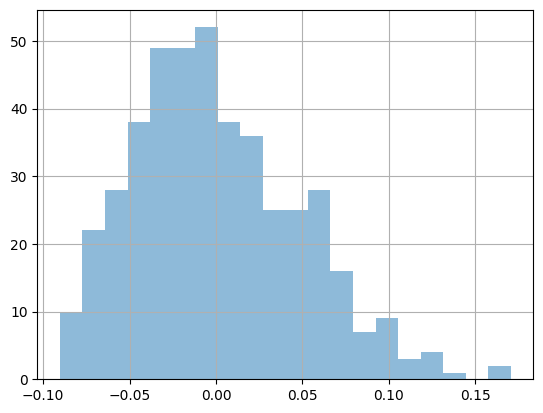

In [13]:
X1.hist(bins=20, alpha=0.5, label='BMI')

Это распределение выглядит более лучше чем ниже с логарифмированием

<Axes: >

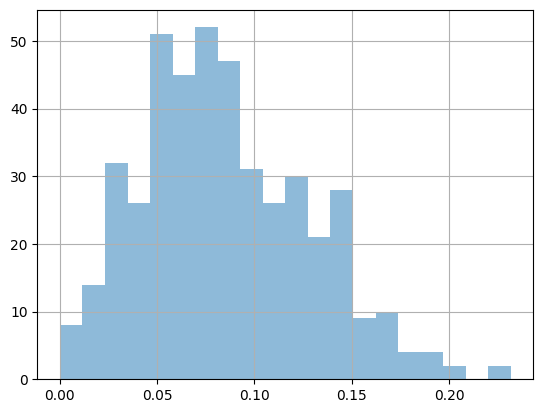

In [14]:
X2.hist(bins=20, alpha=0.5, label='Log(BMI)')

**Результаты показывают, что модель, использующая исходную функцию BMI, работает лучше, чем функция BMI с логарифмическим преобразованием.**

 В частности, среднеквадратичная ошибка (MSE) и средняя абсолютная ошибка (MAE) 
 
 для исходного BMI ниже по сравнению с версией с логарифмическим преобразованием.

#### Интерпретация результатов: 
* BMI (X1):
* MSE = 3890,46
* MAE = 51,80
* Логарифм (BMI) (X2):
* MSE = 3894.50 
* MAE = 51.85

Как результат, в данном логарифмировании, это лишняя трата вычислительных ресурсов и времени на предобработку, но в целом это очень полезная вещь!


In [ ]:
from itertools import combinations, chain
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm


# Разделяем признаки и целевую переменную
X_all = df.drop(columns="target")
Y_all = df["target"]

# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)

# Функция всех подмножеств признаков
def get_all_subsets(array):
    all_subsets = []
    for r in range(1, len(array) + 1):
        all_subsets.append(combinations(array, r))
    return list(chain(*all_subsets))

# Подмножества признаков
features = X_train.columns
feature_subsets = get_all_subsets(features)

# Поиск модели с наименьшим AIC на train
best_aic = float('inf')
best_subset = None
best_model = None

"""AIC (Akaike Information Criterion) — это метрика, которая балансирует точность модели и сложность (количество параметров). Чем меньше значение AIC тем лучше"""

for subset in feature_subsets:
    X_tr = sm.add_constant(X_train[list(subset)], has_constant='add')
    model = sm.OLS(Y_train, X_tr).fit()
    aic = model.aic

    if aic < best_aic:
        best_aic = aic
        best_subset = subset
        best_model = model

# Оценка на test
X_te = sm.add_constant(X_test[list(best_subset)], has_constant='add')
Y_pred = best_model.predict(X_te)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Вывод результатов
print(f"Best Model (features: {best_subset})")
print(f"AIC (train): {best_aic:.2f}")
print(f"MSE (test): {mse:.2f}")
print(f"MAE (test): {mae:.2f}")

Best Model (features: ('sex', 'bmi', 'bp', 's1', 's2', 's4', 's5'))
AIC (train): 3359.74
MSE (test): 2821.74
MAE (test): 41.90


Странно, переменная sex практически не коррелирует с целевой переменной (target), ее включение в модель должно влиять на результат слабо. 

Есть преположение что остальные более существенные признаки гасятся из-за мультиколлениарности. 

* s1 и s2: корреляция 0.90
* s4 и s3: корреляция -0.74
* s4 и s2: 0.66
* s5 и s4: 0.62

### Удаление одного из пары сильно коррелирующих признаков

In [25]:
# age	sex	bmi	bp	s1	s2	s3	s4	s5	s6	target

# Разделяем признаки и целевую переменную
# Удаляем сильно коррелирующие признаки
df_reduced = df.drop(columns=['s2', 's4'])

# Разделяем данные на признаки (X) и целевую переменную (y)
X_all = df_reduced[['sex', 'bmi', 'bp', 's1', 's3', 's5']]
Y_all = df["target"]

# Train/Test split
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)

# Функция всех подмножеств признаков
def get_all_subsets(array):
    all_subsets = []
    for r in range(1, len(array) + 1):
        all_subsets.append(combinations(array, r))
    return list(chain(*all_subsets))

# Подмножества признаков
features = X_train.columns
feature_subsets = get_all_subsets(features)

# Поиск модели с наименьшим AIC на train
best_aic = float('inf')
best_subset = None
best_model = None

for subset in feature_subsets:
    X_tr = sm.add_constant(X_train[list(subset)], has_constant='add')
    model = sm.OLS(Y_train, X_tr).fit()
    aic = model.aic

    if aic < best_aic:
        best_aic = aic
        best_subset = subset
        best_model = model

# Оценка на test
X_te = sm.add_constant(X_test[list(best_subset)], has_constant='add')
Y_pred = best_model.predict(X_te)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

# Вывод результатов
print(f"Best Model (features: {best_subset})")
print(f"AIC (train): {best_aic:.2f}")
print(f"MSE (test): {mse:.2f}")
print(f"MAE (test): {mae:.2f}")


Best Model (features: ('sex', 'bmi', 'bp', 's1', 's3', 's5'))
AIC (train): 3361.22
MSE (test): 2798.27
MAE (test): 41.99


In [48]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd


# df = pd.read_csv('your_data.csv')

df_reduced = df.copy()

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df_reduced
y = df_reduced['target']  # 

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
# scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применяем PCA
pca = PCA(n_components=4)  # Выбираем 2-5 компоненты, чтобы уменьшить размерность, можно увеличить по необходимости
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Обучаем модель на главных компонентах
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Прогнозируем на тестовой выборке
y_pred = model.predict(X_test_pca)

# Рассчитываем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Рассчитываем AIC (Akaike Information Criterion)
n = len(y_test)  # количество наблюдений
p = X_train_pca.shape[1]  # количество признаков после применения PCA (т.е. количество компонент)
rss = ((y_test - y_pred) ** 2).sum()  # остаточная сумма квадратов
aic = n * np.log(rss / n) + 2 * p  # Формула для AIC

# Выводим результаты
print(f"AIC (train): {aic}")
print(f"MSE (test): {mse}")
print(f"MAE (test): {mae}")

AIC (train): 653.2158781650343
MSE (test): 1407.5650963845248
MAE (test): 30.598991214781552


При увелечение n_components количества главных компонентов метрика после 9 не рельно улучшается - возможно происходит переобучение.
Нужно найти оптимальное значение n_components.

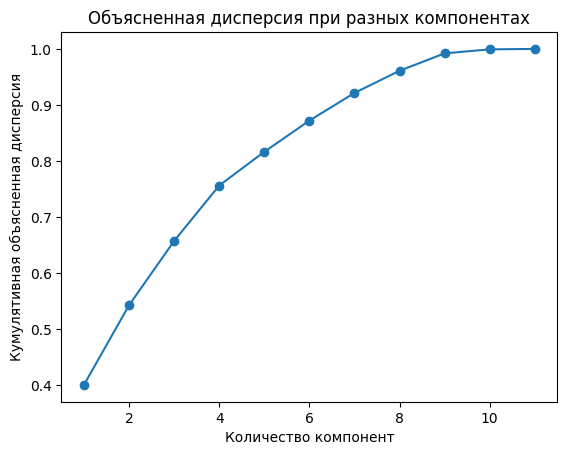

In [40]:
import matplotlib.pyplot as plt

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA
pca = PCA()
pca.fit(X_scaled)

# Строим график объясненной дисперсии
explained_variance = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.title('Объясненная дисперсия при разных компонентах')
plt.show()

На графике изображена кумулятивная объясненная дисперсия данных в зависимости от количества компонент, выбранных в PCA.

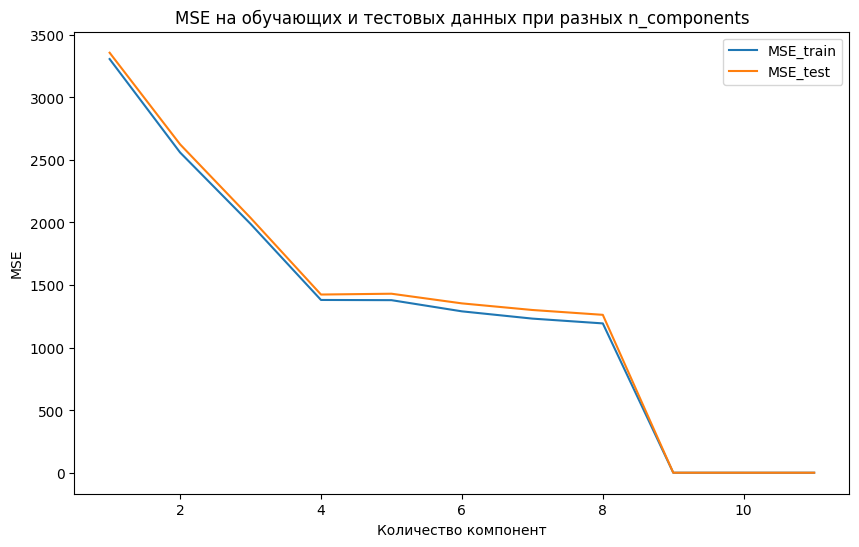

In [47]:
"""Проверка на переобучение: Для проверки на переобучение стоит использовать кросс-валидацию. 
Это поможет вам увидеть, как модель работает на различных подмножествах данных.
На основе этого сделаем анализ графика AIC и MSE: Лучше всего строить графики AIC и MSE в зависимости от количества 
компонент и искать точку, где метрики стабилизируются, а не продолжают улучшаться.
"""

from sklearn.model_selection import cross_val_score, KFold

# Удаляем сильно коррелирующие признаки
# df_reduced = df.drop(columns=['s2', 's4'])

# Разделяем данные на признаки (X) и целевую переменную (y)
# X = df_reduced[['sex', 'bmi', 'bp', 's1', 's3', 's5']]
X = df.copy()
y = df_reduced['target']  # 

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Подготовка к кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Словарь для хранения результатов
results = {'n_components': [], 'MSE_train': [], 'MSE_test': [], 'MAE_train': [], 'MAE_test': []}

# Пробуем разные значения для n_components
for n in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    model = LinearRegression()

    # Кросс-валидация
    train_errors = []
    test_errors = []
    
    for train_idx, test_idx in kf.split(X_pca):
        X_train, X_test = X_pca[train_idx], X_pca[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)

        # Прогнозируем на обучающих и тестовых данных
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Считаем ошибки
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))

    # Сохраняем результаты
    results['n_components'].append(n)
    results['MSE_train'].append(np.mean(train_errors))
    results['MSE_test'].append(np.mean(test_errors))
    results['MAE_train'].append(np.mean(np.abs(y_train - y_train_pred)))
    results['MAE_test'].append(np.mean(np.abs(y_test - y_test_pred)))

# Конвертируем результаты в DataFrame
results_df = pd.DataFrame(results)

# Отображаем результаты
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(results_df['n_components'], results_df['MSE_train'], label='MSE_train')
plt.plot(results_df['n_components'], results_df['MSE_test'], label='MSE_test')
plt.xlabel('Количество компонент')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE на обучающих и тестовых данных при разных n_components')
plt.show()

# Также можно визуализировать MAE, AIC и другие метрики, если нужно.

Оптимальное значение n_components 4

# Problem 6. (1 point, 2 bonus point) 
Computer experiment. Use the following code to load the
data:

In [ ]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
df = data["frame"]
X = df["color_intensity"]
Y = df["hue"]

In [51]:
from scipy.stats import pearsonr
# Compute Pearson's correlation and p-value
rho, p_value = pearsonr(X, Y)
# Print the results
print("Pearson's correlation coefficient (ρ):", rho)
print("p-value:", p_value)

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence that X and Y are dependent.")
else:
    print("Fail to reject H0: There is no evidence that X and Y are dependent.")

Pearson's correlation coefficient (ρ): -0.5218131932287576
p-value: 8.075008429978308e-14
Reject H0: There is evidence that X and Y are dependent.


# Problem 7. (2 bonus points) Computer experiment.
Use the following code to load the data:

In [59]:
from sklearn.datasets import load_linnerud
data = load_linnerud(as_frame=True)
df = data["target"]
X = df["Weight"]
Y = df["Waist"]

In [61]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(X, Y)

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

# Check if we reject the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence that X and Y are dependent.")
else:
    print("Fail to reject H0: There is no evidence that X and Y are dependent.")

Chi-Square statistic: 124.16666666666666
p-value: 0.3787242352308016
Degrees of freedom: 120
Expected frequencies table:
 [[0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.1  0.1  0.4  0.3  0.2  0.3  0.3  0.2  0.1 ]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.1  0.1  0.4  0.3  0.2  0.3  0.3  0.2  0.1 ]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.1  0.1  0.4  0.3  0.2  0.3  0.3  0.2  0.1 ]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.1  0.1  0.4  0.3  0.2  0.3  0.3  0.2  0.1 ]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]
 [0.05 0.05 0.2  0.15 0.1  0.15 0.15 0.1  0.05]]
Fail to reject H0: There is no evidence that X and Y are dependent.


p-value = 0.3787 больше уровня значимости $α=0.05$

Это означает, что мы не можем отклонить нулевую гипотезу.

Вывод: Мы не отвергаем нулевую гипотезу, то есть нет достаточных доказательств, чтобы утверждать, что переменные X и Y зависимы.